<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

#### En primer lugar consideramos que la ecuación de $f(x)$ se encuentra mal formulada (la variable $x$ se encuentra fuera de la exponencial y le falta el signo negativo a ésta última), por lo cual la reformulamos para poder proceder con los cálculos:

$$
f ( x ) = \begin{cases}
~~ 0.01e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

#### Se puede estimar el tiempo de vida en horas de una computadora calculando su esperanza. Esto nos dará el tiempo de vida medio de una computadora para la f.d.p dada. Analíticamente, para una variable aleatoria continua, la esperanza se calcula como la integral de todos los valores que la misma puede asumir por su función de probabilidad:

$$
\int_{-\infty}^{\infty}xf(x)dx
$$

#### Teniendo en cuenta la f.d.p dada, la ecuación quedará como sigue:
  
$$
\int_{0}^{\infty}x\lambda e^{-\lambda x}dx
$$
  
#### Resolviendo la integral anterior, se llega a que la vida media de una computadora estará dada por:
  
$$
\frac{1}{\lambda}
$$
    
#### Y para nuestro caso particular, con un $\lambda=0.01$, el tiempo de vida en horas será de $100$ horas.

In [22]:
%matplotlib inline
from scipy.stats import expon

def fdp_function(_lambda, x):
    return expon.pdf(x, scale=1/_lambda)
def fda_function(_lambda, x):
    return expon.cdf(x, scale=1/_lambda)

#### La F.d.a no es otra cosa que la función de probabilidad acumulada y estará representada por el área bajo la curva de la f.d.p, analíticamente será la integral entre $0$ y un determinado $x$ de la función f.d.p:

$$
\int_{0}^{x}\lambda e^{-\lambda t}dt = e^{-\lambda t}\mid_{0}^{x}
$$

#### Evaluando este último resultado entre $0$ y $x$ podemos obtener nuestra f.d.a de $X$:

$$
f ( x ) = \begin{cases}
~~ 1 - e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

In [23]:
print("\nLa probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es de: " 
      + str(fda_function(0.01, 150) - fda_function(0.01, 50))+'\n')


La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es de: 0.38340049956420363



In [24]:
print("\nLa probabilidad que la computadora se descomponga antes de registrar 100 horas de uso es de: "
     + str(fda_function(0.01, 100))+'\n')


La probabilidad que la computadora se descomponga antes de registrar 100 horas de uso es de: 0.6321205588285577



## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [25]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [26]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, density=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 
    plt.show()

Sample descriptive statistics:
                  0
count  10000.000000
mean       0.059983
std        5.048895
min      -19.938845
25%       -3.292299
50%        0.056112
75%        3.445480
max       19.585262


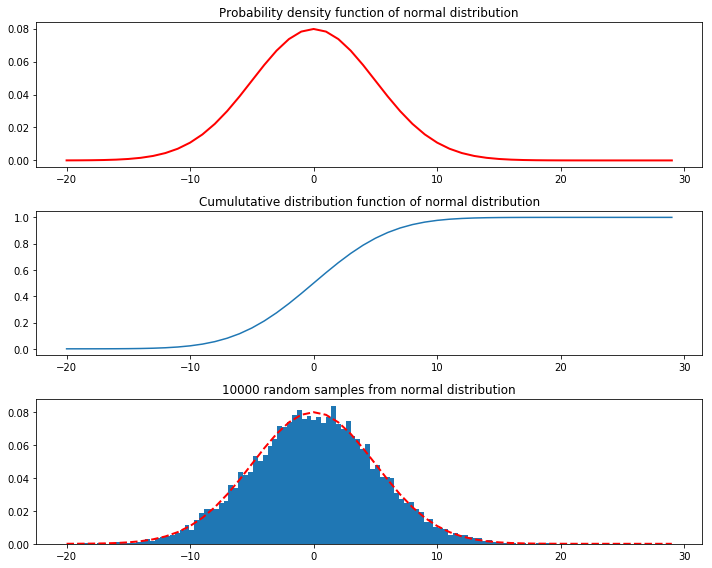

In [27]:
graphic_normal(mu, sigma, rng)

### Modicando $\mu$

Sample descriptive statistics:
                  0
count  10000.000000
mean      -9.882800
std        4.989677
min      -28.464890
25%      -13.221364
50%       -9.942979
75%       -6.454281
max        9.796950


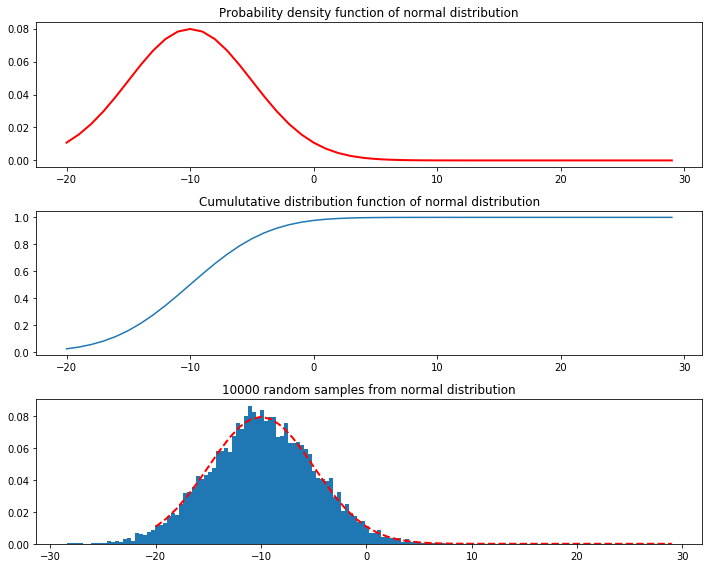

mu = -10, sigma = 5, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -4.944068
std        5.044608
min      -24.120068
25%       -8.366886
50%       -4.926525
75%       -1.516656
max       16.914472


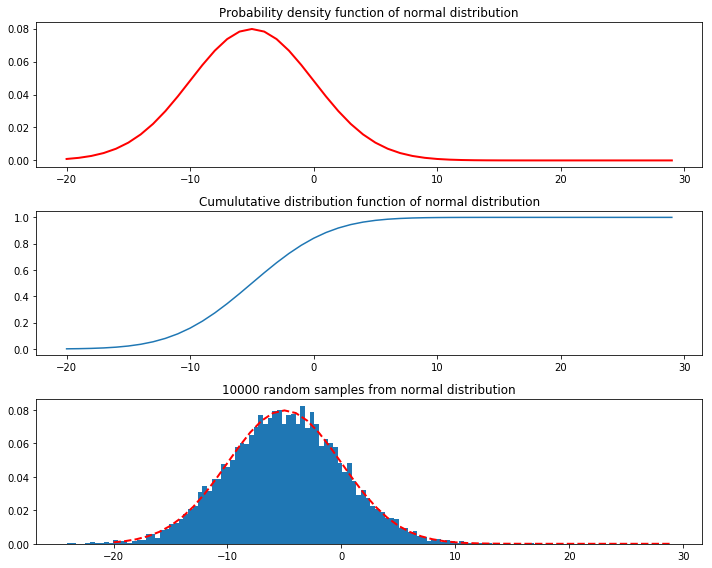

mu = -5, sigma = 5, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.067500
std        4.963777
min      -22.579359
25%       -3.402709
50%       -0.032150
75%        3.291926
max       22.499254


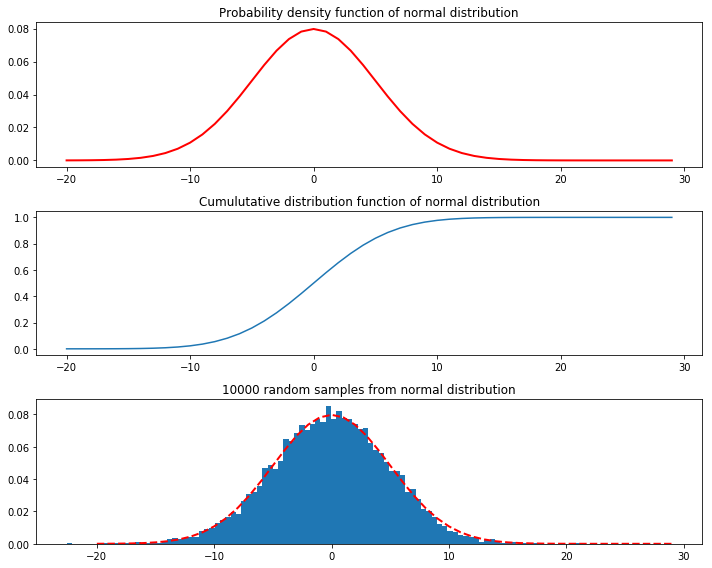

mu = 0, sigma = 5, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean       4.922345
std        5.033436
min      -15.493961
25%        1.572780
50%        4.958116
75%        8.304421
max       25.556223


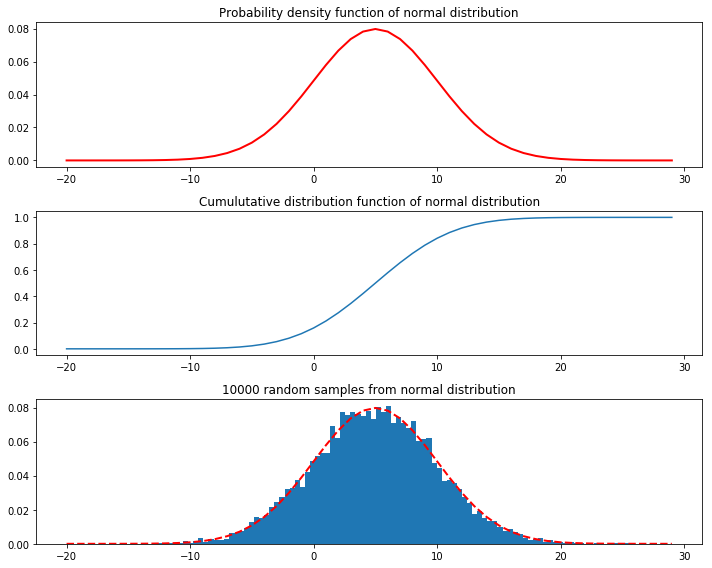

mu = 5, sigma = 5, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean       9.943984
std        5.110644
min      -10.856862
25%        6.431997
50%        9.947874
75%       13.400359
max       29.889729


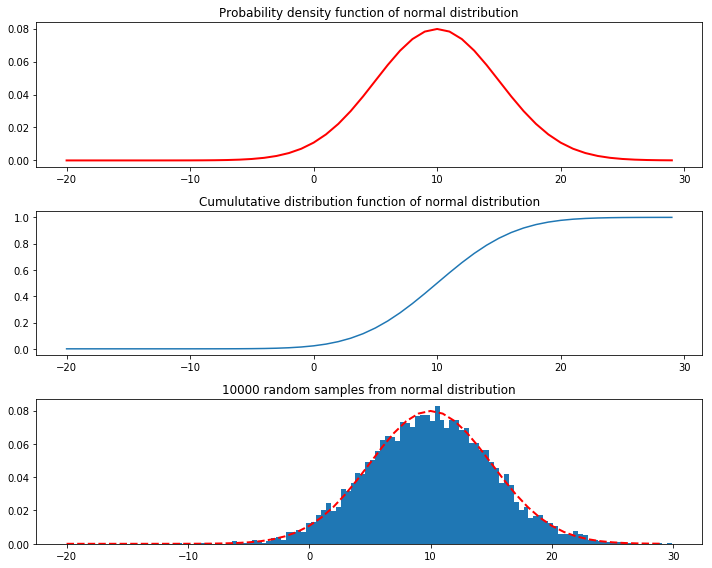

mu = 10, sigma = 5, range(-20, 30)
--------------------------------------------------------------------------------------------




In [28]:
sigma = 5
rng = range(-20,30)

for muu in range(-10,15,5):
    graphic_normal(muu, sigma, rng)
    print("mu = "+str(muu)+", sigma = "+str(sigma)+", "+str(rng))
    print("--------------------------------------------------------------------------------------------\n\n")

#### En primer lugar podemos decir que la distribución normal es simétrica respescto a $\mu$ y posee puntos de inflexión en $x=\mu-\sigma$ y $x=\mu+\sigma$. 

#### Si se modifica el valor de $\mu$, se logra que el lóbulo central de la campana se mueva a lo largo del eje $x$, en concordancia con dicho valor. Por ejemplo: si $\mu=0$, el centro de la campana se ubica en $x=0$. Por otra parte, si $\mu=3$, el centro de la campana se ubica en la posición $x=3$ y así sucesivamente para el resto de los valores. Es decir que modificando el valor de $\mu$ logramos posicionar la campana en distintos puntos del eje $x$ y en cuanto a su propiedad estadística, podemos decir que el valor $\mu$, corresponde a la media de dicho experimento aleatorio.

### Modificando $\sigma$

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.011593
std        0.989218
min       -4.162895
25%       -0.681234
50%       -0.010234
75%        0.646380
max        3.941013


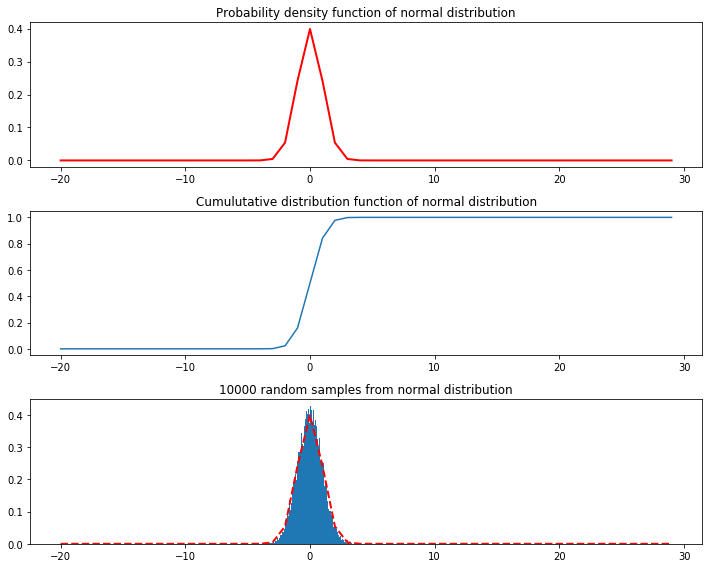

mu = 0, sigma = 1, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.034621
std        5.985124
min      -22.941541
25%       -4.078896
50%        0.034961
75%        4.007708
max       22.456922


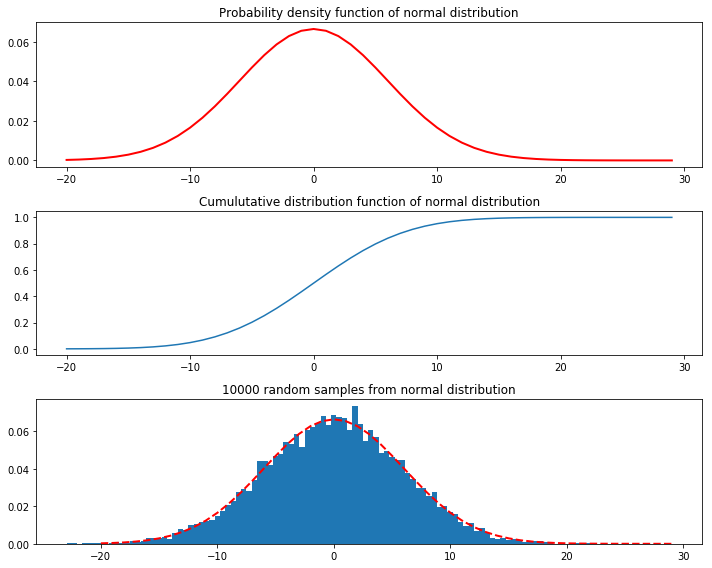

mu = 0, sigma = 6, range(-20, 30)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.105253
std       11.049242
min      -50.803441
25%       -7.518940
50%       -0.178615
75%        7.342261
max       46.785659


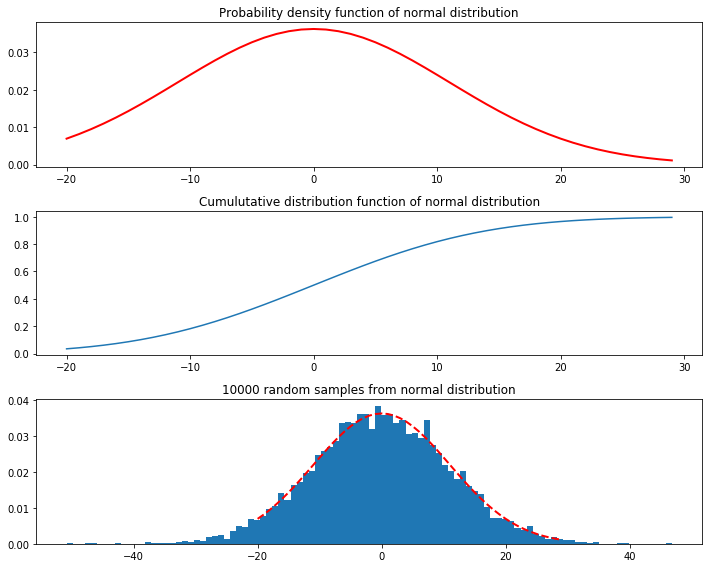

mu = 0, sigma = 11, range(-20, 30)
--------------------------------------------------------------------------------------------




In [29]:
mu = 0
rng = range(-20,30)

for sigmaa in range(1,16,5):
    graphic_normal(mu, sigmaa, rng)
    print("mu = "+str(mu)+", sigma = "+str(sigmaa)+", "+str(rng))
    print("--------------------------------------------------------------------------------------------\n\n")

#### Si se modifica el valor de $\sigma$, se observa una modificación en el ancho de la campana, mientras más grande el valor de $\sigma$, más grande es la desviación de los resultados del experimiento, con respecto al valor medio. De manera opuesta, para un valor más pequeño de $\sigma$, se logra una campana mucho más concentrada sobre el valor medio de la misma.

#### A modo de ejemplo, mientras más grande es la desviación estándar $\sigma$, los resultados del experimento van a tomar valores que distan bastante el valor de la media. Por el contrario, si el valor de $\sigma$ es pequeño, todos los resultados van a ubicarse muy próximos a la media de dicho experimento.

#### Como dato adicional, se muestra una imagen donde se puede observar como el valor de $\mu$ determina la ubicación de la camapana y $\sigma$ determina el ancho de la campana. Además, podemos observar que entre $\mu-\sigma$ y $\mu+\sigma$ se encuentra más del $68\%$ de los valores de la campana, entre $\mu-2\sigma$ y $\mu+2\sigma$ más del $95\%$ y entre $\mu-3\sigma$ y $\mu+3\sigma$ más del $99\%$.

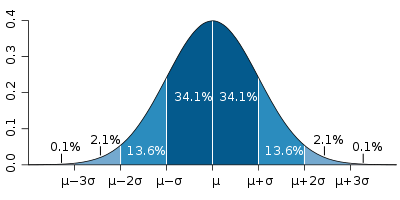

In [30]:
from IPython.display import Image
Image("sigma.png")

### Modificando el rango

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.065745
std        5.005582
min      -21.047029
25%       -3.469650
50%       -0.111563
75%        3.295534
max       20.243972


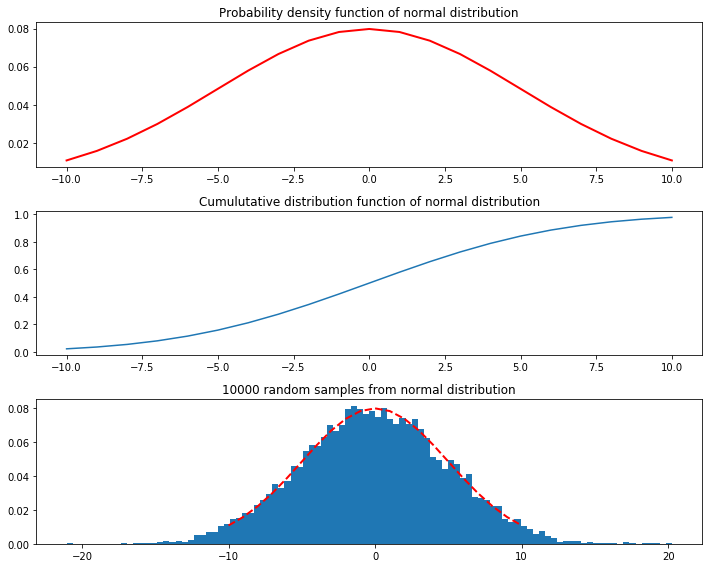

mu = 0, sigma = 5, range(-10, 11)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.069418
std        5.013122
min      -18.998222
25%       -3.463205
50%       -0.044497
75%        3.307869
max       17.989348


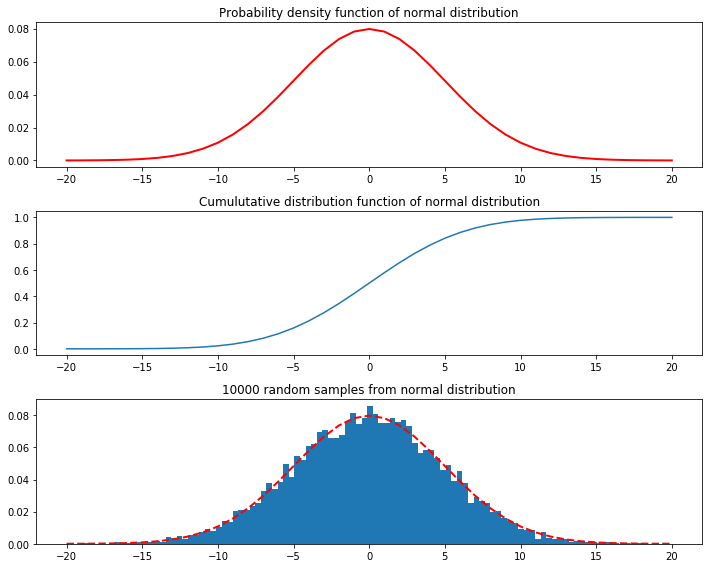

mu = 0, sigma = 5, range(-20, 21)
--------------------------------------------------------------------------------------------


Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.084491
std        4.957716
min      -18.717031
25%       -3.417479
50%       -0.147349
75%        3.184206
max       18.066826


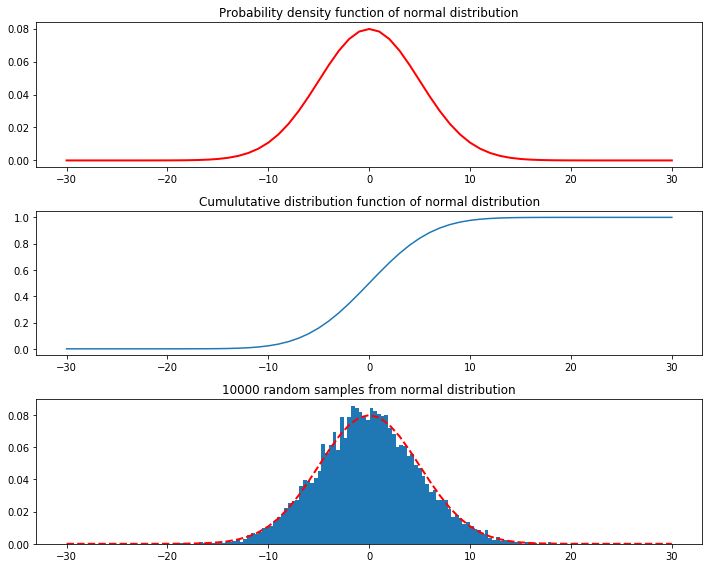

mu = 0, sigma = 5, range(-30, 31)
--------------------------------------------------------------------------------------------




In [31]:
mu = 0
sigma = 5

for rngo in [range(-10,11),range(-20,21),range(-30,31)]:
    graphic_normal(mu, sigma, rngo)
    print("mu = "+str(mu)+", sigma = "+str(sigma)+", "+str(rngo))
    print("--------------------------------------------------------------------------------------------\n\n")

#### Si modificamos el rango de la variable aleatoria y dependiendo de los valores de $\mu$ y $\sigma$, podemos observar como las probabilidades resultantes son más o menos probables de ocurrir, lo que significa que dicho rango es más o menos probable, dependiendo que tan cerca del valor medio de la campana se encuentre.

#### Vamos a poner un ejemplo: si $\mu=0$ y $\sigma=5$, más del $99\%$ de la distribución la vamos a encontrar en el intervalo $(-15,15)$, por lo tanto si establecemos un rango de $(-50,50)$, resulta obvio que la mayoría de dichos valores de $x$ (menores a $-15$ y mayores a $15$) van a tener una probabilidad de ocurrencia cercana a $0$, ya que la mayoría de los resultados del experimento van a caer dentro del intervalo $(-15,15)$.